In [3]:
# import a few things from nipype and external libraries
import os
from os.path import abspath

from nipype import Workflow, Node, MapNode, Function
from nipype.interfaces.fsl import BET, IsotropicSmooth, ApplyMask

from nilearn.plotting import plot_anat
%matplotlib inline
import matplotlib.pyplot as plt

# the warnings are worryless - it is due to compiled against older version of numpy.

/Users/z3402744/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Python2 support is deprecated and will be removed in a future release. Consider switching to Python3.
  
/Users/z3402744/Library/Python/2.7/lib/python/site-packages/sklearn/utils/graph.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .graph_shortest_path import graph_shortest_path  # noqa
/Users/z3402744/Library/Python/2.7/lib/python/site-packages/sklearn/linear_model/base.py:35: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ..utils.seq_dataset import ArrayDataset, CSRDataset
/Users/z3402744/Library/Python/2.7/lib/python/site-packages/sklearn/linear_model/least_angle.py:23: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ..utils import arrayfuncs, as_float_array, check_X_y, deprecated
/Users/z3402744/Lib

In [7]:
# interfaces - python modules allowing you to use various external packages (e.g. FSL, SPM, FreeSurfer)
input_file = abspath ("/Users/z3402744/Work/test/sub-1805A/anat/sub-1805A_T1w.nii.gz")

# FSL BET interface
bet = BET()
bet.inputs.in_file = input_file
bet.inputs.out_file = "/Users/z3402744/Work/test/derivatives/anat/T1w_nipype_bet.nii.gz"
res = bet.run()

In [8]:
# check the output
res.outputs


inskull_mask_file = <undefined>
inskull_mesh_file = <undefined>
mask_file = <undefined>
meshfile = <undefined>
out_file = /Users/z3402744/Work/test/derivatives/anat/T1w_nipype_bet.nii.gz
outline_file = <undefined>
outskin_mask_file = <undefined>
outskin_mesh_file = <undefined>
outskull_mask_file = <undefined>
outskull_mesh_file = <undefined>
skull_mask_file = <undefined>

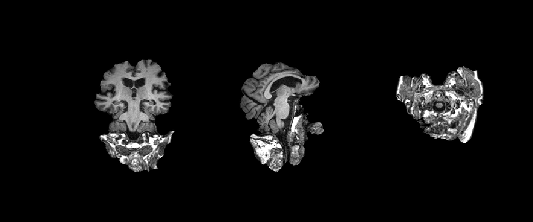

In [9]:
# plot output file
plot_anat ('/Users/z3402744/Work/test/derivatives/anat/T1w_nipype_bet.nii.gz',
           display_mode = 'ortho', dim = -1, draw_cross = False, annotate = False)

In [11]:
# check the list of arguments using help method
BET.help()

Wraps the executable command ``bet``.

FSL BET wrapper for skull stripping

For complete details, see the `BET Documentation.
<https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/BET/UserGuide>`_

Examples
--------
>>> from nipype.interfaces import fsl
>>> btr = fsl.BET()
>>> btr.inputs.in_file = 'structural.nii'
>>> btr.inputs.frac = 0.7
>>> btr.inputs.out_file = 'brain_anat.nii'
>>> btr.cmdline
'bet structural.nii brain_anat.nii -f 0.70'
>>> res = btr.run() # doctest: +SKIP

Inputs::

        [Mandatory]
        in_file: (an existing file name)
                input file to skull strip
                argument: ``%s``, position: 0

        [Optional]
        remove_eyes: (a boolean)
                eye & optic nerve cleanup (can be useful in SIENA)
                argument: ``-S``
                mutually_exclusive: functional, reduce_bias, robust, padding,
                  remove_eyes, surfaces, t2_guided
        no_output: (a boolean)
                Don't generate segmented output
           

In [12]:
# Exercise 1a
# import IsotropicSmooth from nipype.interfaces.fsl, and find out the FSL command that is being run.
# What are the mandatory inputs for this interface?
from nipype.interfaces.fsl import IsotropicSmooth
IsotropicSmooth.help()

Wraps the executable command ``fslmaths``.

Use fslmaths to spatially smooth an image with a gaussian kernel.

Inputs::

        [Mandatory]
        sigma: (a float)
                sigma of smoothing kernel [mm]
                argument: ``-s %.5f``, position: 4
                mutually_exclusive: fwhm
        fwhm: (a float)
                fwhm of smoothing kernel [mm]
                argument: ``-s %.5f``, position: 4
                mutually_exclusive: sigma
        in_file: (an existing file name)
                image to operate on
                argument: ``%s``, position: 2

        [Optional]
        nan2zeros: (a boolean)
                change NaNs to zeros before doing anything
                argument: ``-nan``, position: 3
        out_file: (a file name)
                image to write
                argument: ``%s``, position: -2
        args: (a unicode string)
                Additional parameters to the command
                argument: ``%s``
        internal_datat

In [13]:
# Exercise 1b
# Run IsotropicSmooth with a smoothing kernel of 4mm
smoothing = IsotropicSmooth()
smoothing.inputs.in_file = "/Users/z3402744/Work/test/sub-1805A/anat/sub-1805A_T1w.nii.gz"
smoothing.inputs.fwhm = 4
smoothing.inputs.out_file = "/Users/z3402744/Work/test/derivatives/anat/T1w_nipype_smooth.nii.gz"
smoothing.run()

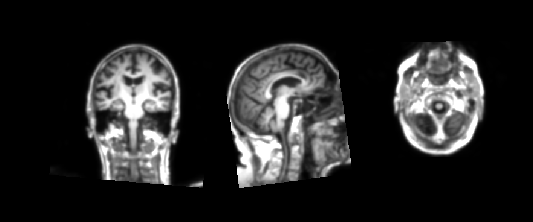

In [14]:
plot_anat ('/Users/z3402744/Work/test/derivatives/anat/T1w_nipype_smooth.nii.gz',
           display_mode = 'ortho', dim = -1, draw_cross = False, annotate = False)

In [26]:
# Node - an object that executes a certain function. This function can be anything from a Nipype interface to
#        a user-specified function or an external script. Each node consists of a name, an interface, and at
#        least one input field and at least one output field.
#
# Workflow - connect different nodes. Nipype workflow will take care of input and output of each interface and
#            arrange the execution of each interface in the most efficient way.

# create node
bet_node = Node (BET(), name = 'bet')
# specify node inputs
bet_node.inputs.in_file = '/Users/z3402744/Work/test/sub-1805A/anat/sub-1805A_T1w.nii.gz'
bet_node.inputs.mask = True
# bet_node.inputs.out_file = '/Users/z3402744/Work/test/derivatives/anat/sub-1805A_T1w_bet.nii.gz'

# # bet node can also be defined as :
# bet_node = Node (BET (in_file = '/Users/z3402744/Work/test/sub-1805A/anat/sub-1805A_T1w.nii.gz',
#                       mask = True,
#                       out_file = '/Users/z3402744/Work/test/derivatives/anat/sub-1805A_T1w_bet.nii.gz'),
#                  name = 'bet_node')

# bet_node.run()

In [27]:
# Create a node for IsotropicSmooth interface
smooth_node = Node (IsotropicSmooth(in_file = '/Users/z3402744/Work/test/sub-1805A/anat/sub-1805A_T1w.nii.gz',
                                    fwhm = 4), 
                    name = 'smooth')

# Create a node for ApplyMask
mask_node = Node (ApplyMask(), name = 'mask')

In [24]:
ApplyMask.help()
# There are two mandatory inputs for ApplyMask (mask_file and in_file).
# We want output of smooth_node as the in_file of ApplyMask, and the mask_file from bet_node
# as the mask_file input of ApplyMask.

Wraps the executable command ``fslmaths``.

Use fslmaths to apply a binary mask to another image.

Inputs::

        [Mandatory]
        mask_file: (an existing file name)
                binary image defining mask space
                argument: ``-mas %s``, position: 4
        in_file: (an existing file name)
                image to operate on
                argument: ``%s``, position: 2

        [Optional]
        nan2zeros: (a boolean)
                change NaNs to zeros before doing anything
                argument: ``-nan``, position: 3
        out_file: (a file name)
                image to write
                argument: ``%s``, position: -2
        args: (a unicode string)
                Additional parameters to the command
                argument: ``%s``
        internal_datatype: (u'float' or u'char' or u'int' or u'short' or
                  u'double' or u'input')
                datatype to use for calculations (default is float)
                argument: ``-dt %s``

In [28]:
# Initialise a workflow
wf = Workflow (name = 'smoothflow', base_dir = '/Users/z3402744/Work/test/derivatives/anat')
# It's very important to specify base_dir (as absolute path), because otherwise all the
# outputs would be saved somewhere in the temporary files.

In [29]:
# connect bet_node output to mask_node input
wf.connect (bet_node,  'mask_file',
            mask_node, 'mask_file')

In [30]:
# connect out_file of smooth_node to in_file of mask_node
wf.connect (smooth_node,  'out_file',
            mask_node,    'in_file')

190125-12:08:50,891 nipype.workflow INFO:
	 Generated workflow graph: /Users/z3402744/Work/test/derivatives/anat/smoothflow/workflow_graph.png (graph2use=hierarchical, simple_form=True).


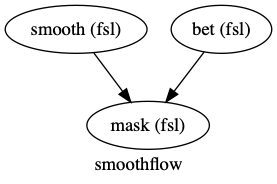

In [32]:
# visualise workflow
wf.write_graph ('workflow_graph.dot')
from IPython.display import Image
Image (filename = '/Users/z3402744/Work/test/derivatives/anat/smoothflow/workflow_graph.png')

190125-12:16:46,114 nipype.workflow INFO:
	 Generated workflow graph: /Users/z3402744/Work/test/derivatives/anat/smoothflow/graph.png (graph2use=flat, simple_form=True).


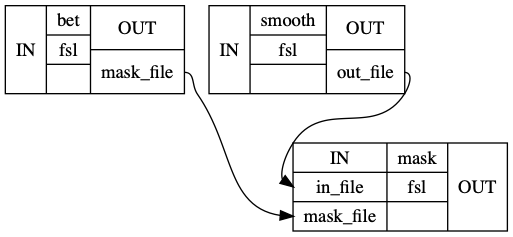

In [35]:
# detailed graph
wf.write_graph (graph2use = 'flat')
from IPython.display import Image
Image (filename = '/Users/z3402744/Work/test/derivatives/anat/smoothflow/graph_detailed.png')

In [36]:
# Execute the workflow
res = wf.run()

190125-12:18:29,668 nipype.workflow INFO:
	 Workflow smoothflow settings: ['check', 'execution', 'logging', 'monitoring']
190125-12:18:29,689 nipype.workflow INFO:
	 Running serially.
190125-12:18:29,691 nipype.workflow INFO:
	 [Node] Setting-up "smoothflow.smooth" in "/Users/z3402744/Work/test/derivatives/anat/smoothflow/smooth".
190125-12:18:29,699 nipype.workflow INFO:
	 [Node] Running "smooth" ("nipype.interfaces.fsl.maths.IsotropicSmooth"), a CommandLine Interface with command:
fslmaths /Users/z3402744/Work/test/sub-1805A/anat/sub-1805A_T1w.nii.gz -s 1.69864 /Users/z3402744/Work/test/derivatives/anat/smoothflow/smooth/sub-1805A_T1w_smooth.nii.gz
190125-12:18:35,62 nipype.workflow INFO:
	 [Node] Finished "smoothflow.smooth".
190125-12:18:35,65 nipype.workflow INFO:
	 [Node] Setting-up "smoothflow.bet" in "/Users/z3402744/Work/test/derivatives/anat/smoothflow/bet".
190125-12:18:35,74 nipype.workflow INFO:
	 [Node] Running "bet" ("nipype.interfaces.fsl.preprocess.BET"), a CommandLine

In [37]:
# Check the output of specific nodes from workflow
list(res.nodes)[0].result.outputs


inskull_mask_file = <undefined>
inskull_mesh_file = <undefined>
mask_file = /Users/z3402744/Work/test/derivatives/anat/smoothflow/bet/sub-1805A_T1w_brain_mask.nii.gz
meshfile = <undefined>
out_file = <undefined>
outline_file = <undefined>
outskin_mask_file = <undefined>
outskin_mesh_file = <undefined>
outskull_mask_file = <undefined>
outskull_mesh_file = <undefined>
skull_mask_file = <undefined>

In [38]:
# output folder structure
! tree -L 3 /Users/z3402744/Work/test/derivatives/anat/smoothflow/

/Users/z3402744/Work/test/derivatives/anat/smoothflow/
├── bet
│   ├── _0x34cf2cb492b5f4102cca963738e4a9cd.json
│   ├── _inputs.pklz
│   ├── _node.pklz
│   ├── _report
│   │   └── report.rst
│   ├── command.txt
│   ├── result_bet.pklz
│   └── sub-1805A_T1w_brain_mask.nii.gz
├── d3.js
├── graph.dot
├── graph.json
├── graph.png
├── graph1.json
├── graph_detailed.dot
├── graph_detailed.png
├── index.html
├── mask
│   ├── _0xbc797cddc7d61aa68921c27489636ab1.json
│   ├── _inputs.pklz
│   ├── _node.pklz
│   ├── _report
│   │   └── report.rst
│   ├── command.txt
│   ├── result_mask.pklz
│   └── sub-1805A_T1w_smooth_masked.nii.gz
├── smooth
│   ├── _0x1daa6bc4ea64705c11da61c3809fd7c7.json
│   ├── _inputs.pklz
│   ├── _node.pklz
│   ├── _report
│   │   └── report.rst
│   ├── command.txt
│   ├── result_smooth.pklz
│   └── sub-1805A_T1w_smooth.nii.gz
├── workflow_graph.dot
└── workflow_graph.png

6 directories, 31 files


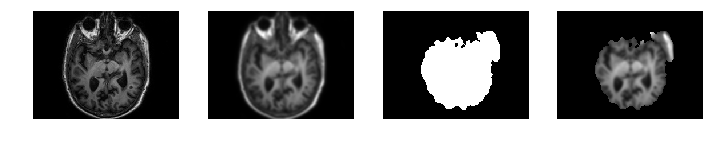

In [39]:
# plot the result
import numpy as np
import nibabel as nb
import matplotlib.pyplot as plt

# a short helper function to plot 3D NIfTI images
def plot_slice (fname):
    
    # Load the image
    img = nb.load (fname)
    data = img.get_data()
    
    # Cut in the middle of the brain
    cut = int (data.shape[-1]/2) + 10
    
    # Plot the data
    plt.imshow (np.rot90(data[..., cut]), cmap = "gray")
    plt.gca().set_axis_off()
    
f = plt.figure (figsize = (12, 4))

for i, img in enumerate (['/Users/z3402744/Work/test/sub-1805A/anat/sub-1805A_T1w.nii.gz',
                          '/Users/z3402744/Work/test/derivatives/anat/smoothflow/smooth/sub-1805A_T1w_smooth.nii.gz',
                          '/Users/z3402744/Work/test/derivatives/anat/smoothflow/bet/sub-1805A_T1w_brain_mask.nii.gz',
                          '/Users/z3402744/Work/test/derivatives/anat/smoothflow/mask/sub-1805A_T1w_smooth_masked.nii.gz']):
    f.add_subplot (1, 4, i+1)
    plot_slice(img)

In [40]:
# ================= #
#     Iterables     #
# ================= #

# e.g. we have node A for simple skull stripping, followed by node B which does isotropic smoothing
#      we are interested in testing different FWHM values 2, 8, 16mm

smooth_node_it = Node (IsotropicSmooth (in_file = '/Users/z3402744/Work/test/sub-1805A/anat/sub-1805A_T1w.nii.gz'),
                       name = "smooth")
smooth_node_it.iterables = ("fwhm", [4, 8, 16])

bet_node_it = Node (BET (in_file = '/Users/z3402744/Work/test/sub-1805A/anat/sub-1805A_T1w.nii.gz',
                         mask = True),
                    name = 'bet_node')

mask_node_it = Node (ApplyMask (), name = "mask")

wf_it = Workflow (name = 'smoothflow_it', base_dir = '/Users/z3402744/Work/test/derivatives/anat/smoothflow_it')
wf_it.connect (smooth_node_it, 'out_file',   mask_node_it, 'in_file')
wf_it.connect (bet_node_it,    'mask_file',  mask_node_it, 'mask_file')

res_it = wf_it.run()

190125-13:25:37,948 nipype.workflow INFO:
	 Workflow smoothflow_it settings: ['check', 'execution', 'logging', 'monitoring']
190125-13:25:37,967 nipype.workflow INFO:
	 Running serially.
190125-13:25:37,969 nipype.workflow INFO:
	 [Node] Setting-up "smoothflow_it.smooth" in "/Users/z3402744/Work/test/derivatives/anat/smoothflow_it/smoothflow_it/_fwhm_4/smooth".
190125-13:25:37,979 nipype.workflow INFO:
	 [Node] Running "smooth" ("nipype.interfaces.fsl.maths.IsotropicSmooth"), a CommandLine Interface with command:
fslmaths /Users/z3402744/Work/test/sub-1805A/anat/sub-1805A_T1w.nii.gz -s 1.69864 /Users/z3402744/Work/test/derivatives/anat/smoothflow_it/smoothflow_it/_fwhm_4/smooth/sub-1805A_T1w_smooth.nii.gz
190125-13:25:43,663 nipype.workflow INFO:
	 [Node] Finished "smoothflow_it.smooth".
190125-13:25:43,665 nipype.workflow INFO:
	 [Node] Setting-up "smoothflow_it.bet_node" in "/Users/z3402744/Work/test/derivatives/anat/smoothflow_it/smoothflow_it/bet_node".
190125-13:25:43,673 nipype.w

In [41]:
# Execute
rest_it = wf_it.run()

190125-14:56:45,72 nipype.workflow INFO:
	 Workflow smoothflow_it settings: ['check', 'execution', 'logging', 'monitoring']
190125-14:56:45,92 nipype.workflow INFO:
	 Running serially.
190125-14:56:45,95 nipype.workflow INFO:
	 [Node] Setting-up "smoothflow_it.smooth" in "/Users/z3402744/Work/test/derivatives/anat/smoothflow_it/smoothflow_it/_fwhm_16/smooth".
190125-14:56:45,105 nipype.workflow INFO:
	 [Node] Cached "smoothflow_it.smooth" - collecting precomputed outputs
190125-14:56:45,107 nipype.workflow INFO:
	 [Node] "smoothflow_it.smooth" found cached.
190125-14:56:45,109 nipype.workflow INFO:
	 [Node] Setting-up "smoothflow_it.smooth" in "/Users/z3402744/Work/test/derivatives/anat/smoothflow_it/smoothflow_it/_fwhm_8/smooth".
190125-14:56:45,114 nipype.workflow INFO:
	 [Node] Cached "smoothflow_it.smooth" - collecting precomputed outputs
190125-14:56:45,116 nipype.workflow INFO:
	 [Node] "smoothflow_it.smooth" found cached.
190125-14:56:45,117 nipype.workflow INFO:
	 [Node] Settin

In [42]:
# Visualise
list (res_it.nodes)

[smoothflow_it.mask.a1,
 smoothflow_it.smooth.aI.a2,
 smoothflow_it.mask.a2,
 smoothflow_it.smooth.aI.a1,
 smoothflow_it.bet_node,
 smoothflow_it.mask.a0,
 smoothflow_it.smooth.aI.a0]

In [44]:
! tree -L 3 /Users/z3402744/Work/test/derivatives/anat/smoothflow_it/

/Users/z3402744/Work/test/derivatives/anat/smoothflow_it/
└── smoothflow_it
    ├── _fwhm_16
    │   ├── mask
    │   └── smooth
    ├── _fwhm_4
    │   ├── mask
    │   └── smooth
    ├── _fwhm_8
    │   ├── mask
    │   └── smooth
    ├── bet_node
    │   ├── _0x34cf2cb492b5f4102cca963738e4a9cd.json
    │   ├── _inputs.pklz
    │   ├── _node.pklz
    │   ├── _report
    │   ├── command.txt
    │   ├── result_bet_node.pklz
    │   └── sub-1805A_T1w_brain_mask.nii.gz
    ├── d3.js
    ├── graph.json
    ├── graph1.json
    └── index.html

12 directories, 10 files


In [45]:
# MapNode - If you want to iterate over a list of inputs, but need to feed all iterated outputs afterward
#           as one input (an array) to the next node, you need a MapNode. A MapNode is quite similar to
#           a normal Node, but it can take a list of inputs and operate over each input separately, ultimately
#           returning a list of outputs.
#           Imagine that you have a list of items/files, and you want to execute the same node on them (e.g.
#           smoothing or masking). MapNode can solve the problem.

# A simple numerical example using nipype Function interface
def square_func (x):
    return x ** 2

square = Function (input_names = ["x"],
                   output_names = ["f_x"],
                   function = square_func)

In [46]:
# If I want to know the results only for one x
square_node = Node (square, name = 'square')
square_node.inputs.x = 2
res = square_node.run()
res.outputs

190125-17:35:42,938 nipype.workflow INFO:
	 [Node] Setting-up "square" in "/private/var/folders/dd/sq3y7v7n6s9gs8j9009zbh180000gn/T/tmpA7M7a3/square".
190125-17:35:42,949 nipype.workflow INFO:
	 [Node] Running "square" ("nipype.interfaces.utility.wrappers.Function")
190125-17:35:42,964 nipype.workflow INFO:
	 [Node] Finished "square".



f_x = 4

In [47]:
# If we have multiple x
# Since square_func does not accept list, we will use MapNode
square_mapnode = MapNode (square, name = "square", iterfield = ["x"])
square_mapnode.inputs.x = [2, 4]
res = square_mapnode.run()
res.outputs

190125-17:43:29,467 nipype.workflow INFO:
	 [Node] Setting-up "square" in "/private/var/folders/dd/sq3y7v7n6s9gs8j9009zbh180000gn/T/tmp0336lI/square".
190125-17:43:29,478 nipype.workflow INFO:
	 [Node] Setting-up "_square0" in "/private/var/folders/dd/sq3y7v7n6s9gs8j9009zbh180000gn/T/tmp0336lI/square/mapflow/_square0".
190125-17:43:29,484 nipype.workflow INFO:
	 [Node] Running "_square0" ("nipype.interfaces.utility.wrappers.Function")
190125-17:43:29,493 nipype.workflow INFO:
	 [Node] Finished "_square0".
190125-17:43:29,496 nipype.workflow INFO:
	 [Node] Setting-up "_square1" in "/private/var/folders/dd/sq3y7v7n6s9gs8j9009zbh180000gn/T/tmp0336lI/square/mapflow/_square1".
190125-17:43:29,502 nipype.workflow INFO:
	 [Node] Running "_square1" ("nipype.interfaces.utility.wrappers.Function")
190125-17:43:29,513 nipype.workflow INFO:
	 [Node] Finished "_square1".
190125-17:43:29,526 nipype.workflow INFO:
	 [Node] Finished "square".


Bunch(f_x=[4, 16])